<a href="https://colab.research.google.com/github/narasimhadv/Image-processing/blob/main/project_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
 import tensorflow as tf
 from tensorflow.keras.datasets import mnist
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Dense, Flatten
 from PIL import Image, ImageOps
 import numpy as np

In [4]:
 # Load the dataset
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

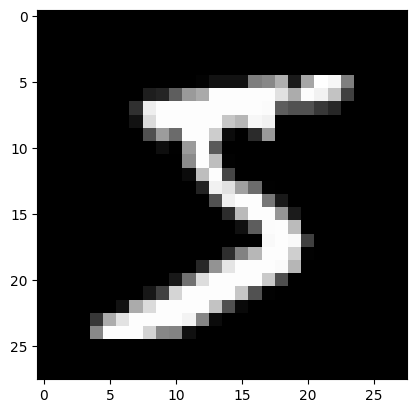

In [6]:
# Display the first image in the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [7]:
# Build the model
model = Sequential([Flatten(input_shape=(28, 28)),Dense(128, activation='relu'),Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8765 - loss: 0.4287
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9639 - loss: 0.1199
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0782
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9826 - loss: 0.0564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0400
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0269
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0210
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9950 - loss: 0.0175
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9965 - loss: 0.0133


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0966
Accuracy: 97.80%


In [11]:
# Function to preprocess the image
def preprocess_image(image_path):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img)
  img = img.resize((28, 28))
  img = np.array(img) / 255.0
  img = img.reshape(1, 28, 28)
  return img

In [12]:
# Path to the handwritten digit image
image_path = '/content/WhatsApp Image 2024-07-27 at 10.32.57_aaf750d3.jpg'
new_image = preprocess_image(image_path)

In [13]:
 # Predict the digit
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Digit: 2


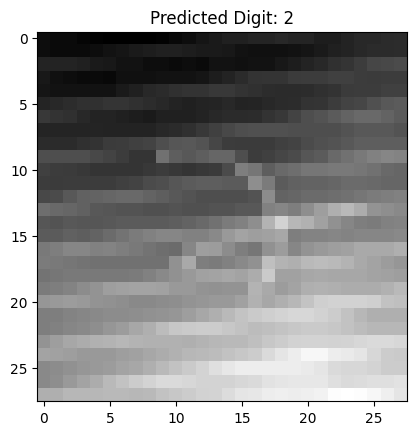

In [14]:
# Display the test image and the predicted digit
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()